In [1]:
import torch
from torchvision.io import read_image

from functions import *

In [2]:
working_directory_path: str = os.getcwd()
images_path: str = working_directory_path + '/images'

dataset: list = load_dataset(images_path, added_new_images = False) # added_new_images = True solo quando vengono aggiunte nuove immagini al path.

In [3]:
model: torchvision.models = load_model_resnet50().to(settings.device)

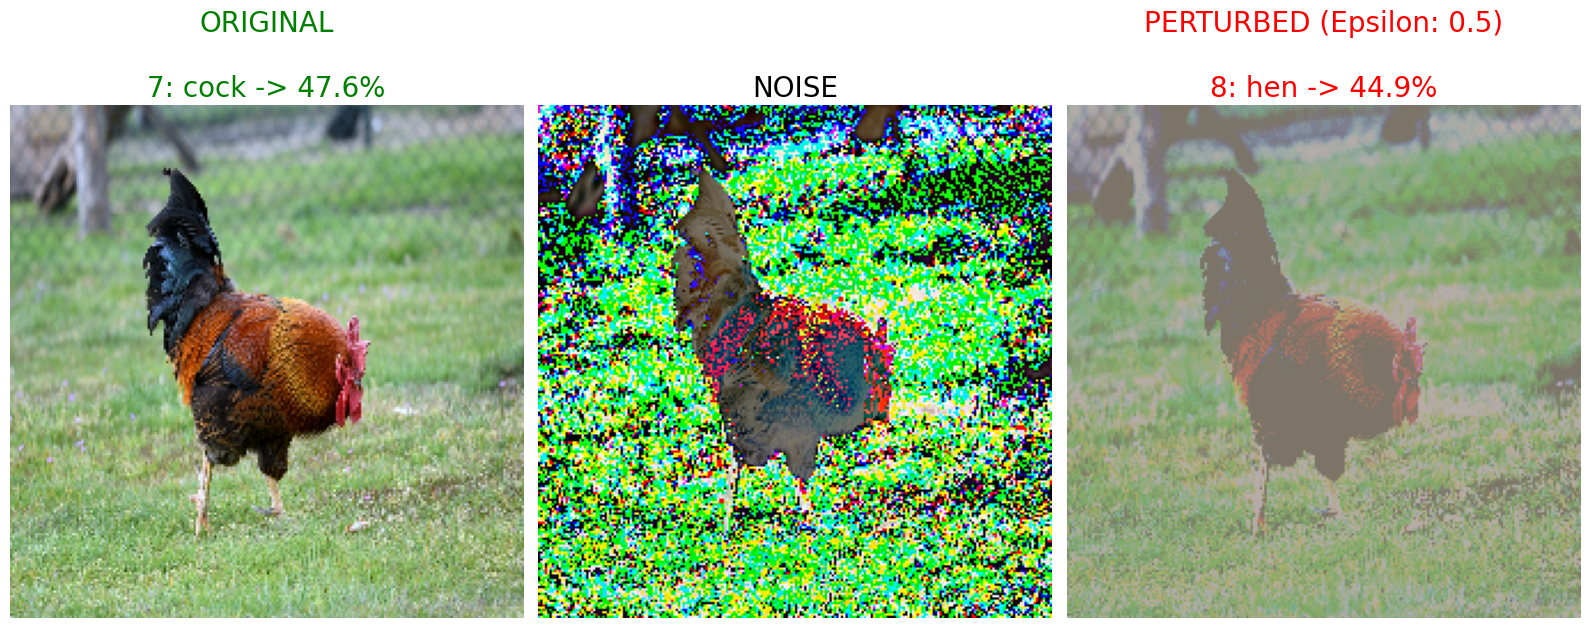

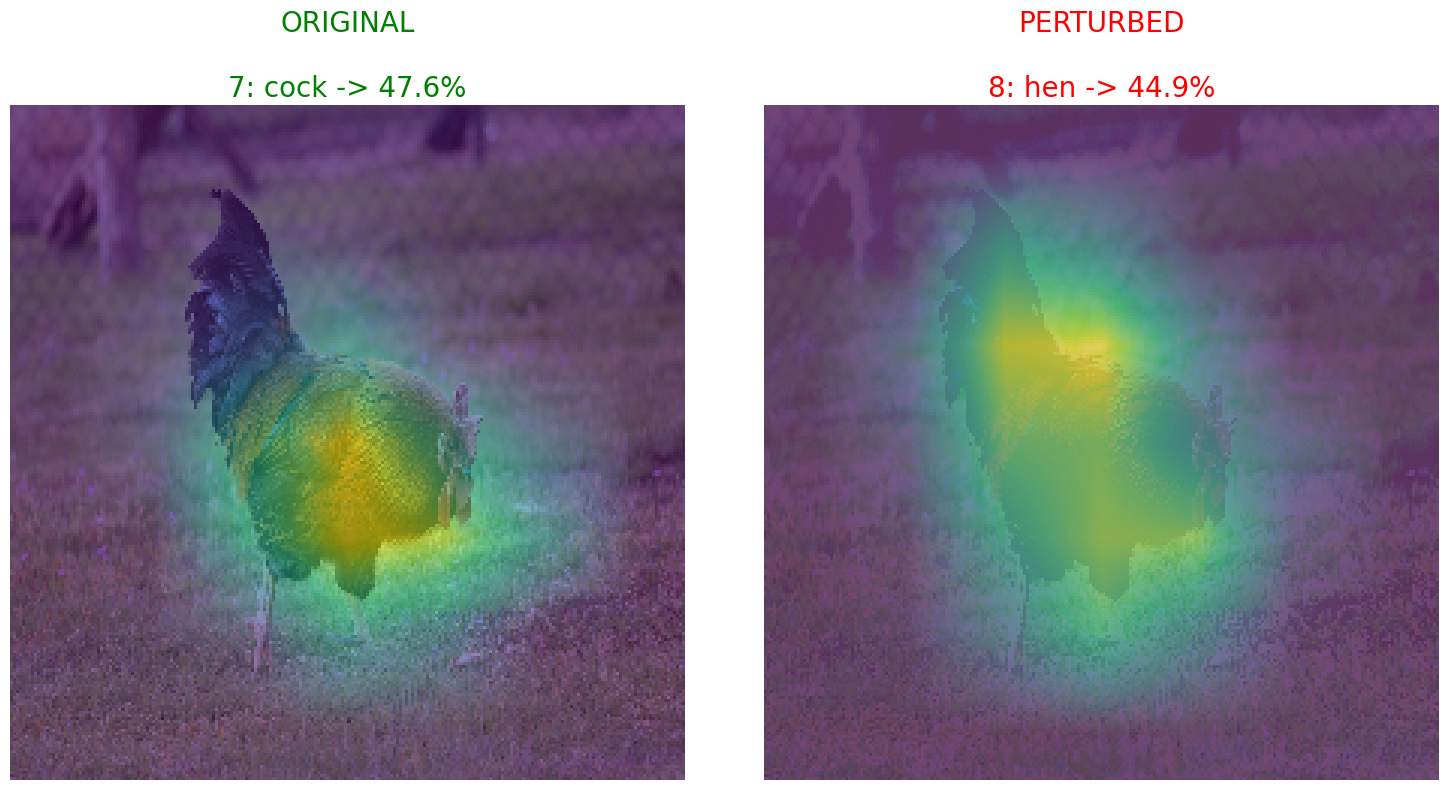

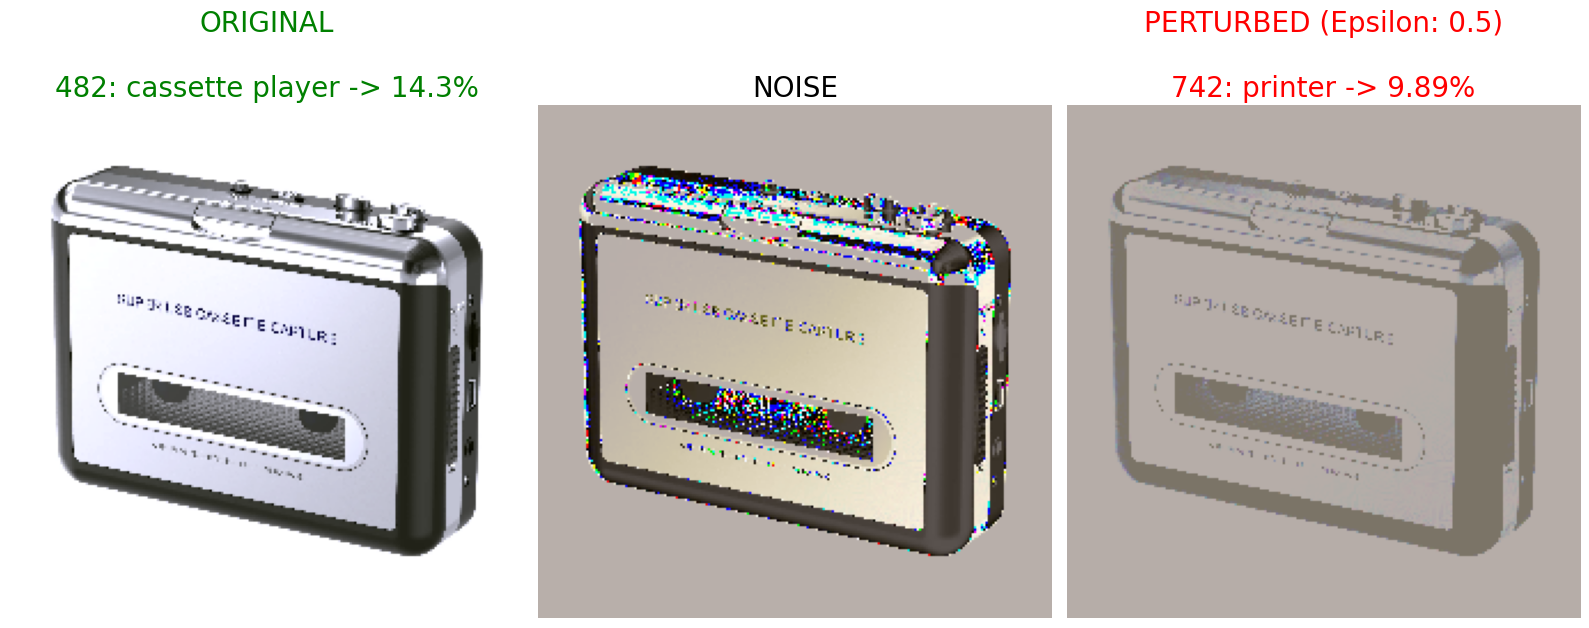

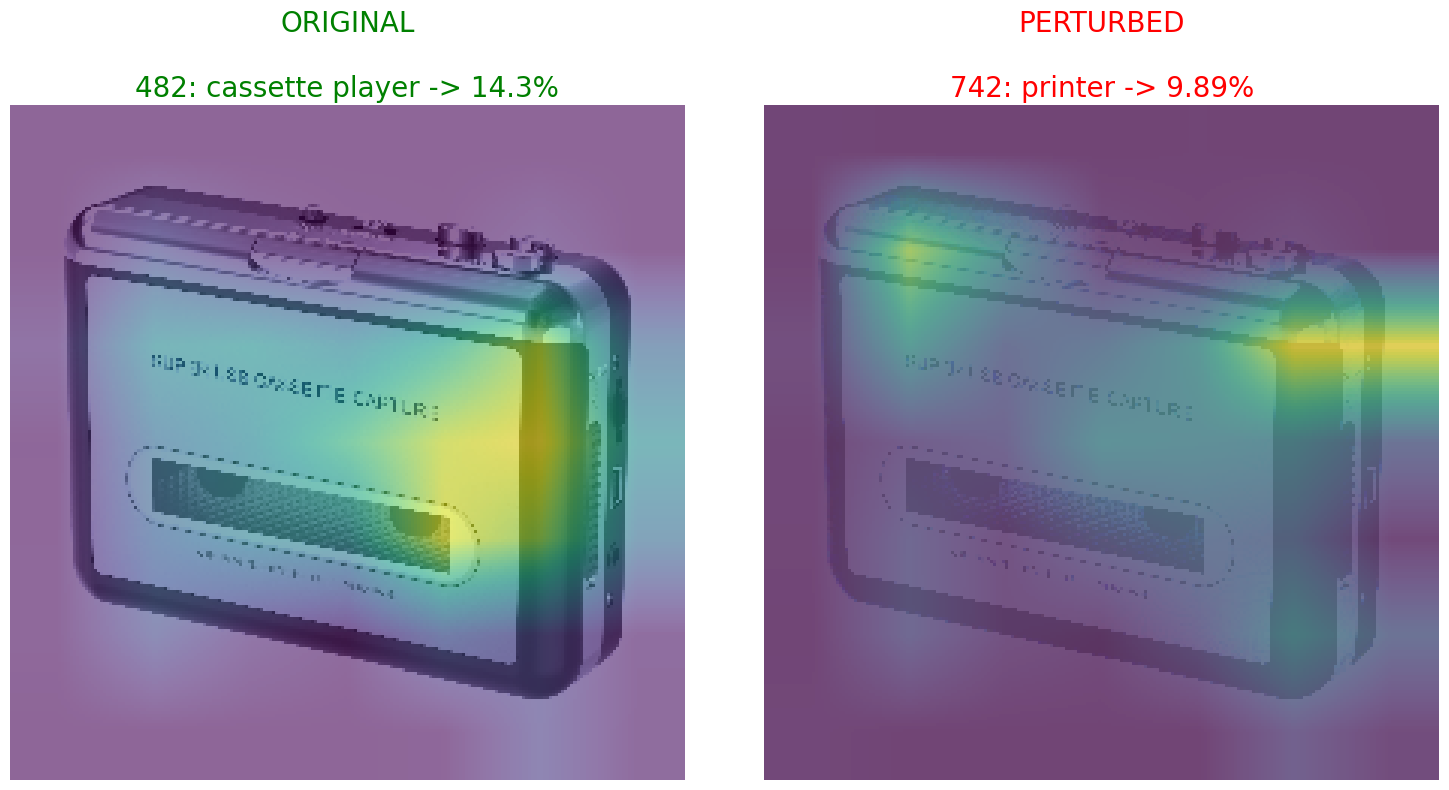

In [4]:
# PGD attack.

epsilon: float = 0.5 # Parametro che controlla l’ampiezza della perturbazione che viene aggiunta all'immagine di input.
iters: int = 100 # Numero di iterazioni richiesto per cercare di massimizzare la funzione di loss.
alpha: float = epsilon/iters # Parametro che regola l'ampiezza del passo di update dell'immagine ad ogni iterazione.
        
triplas: list = []
for image in dataset[:2]: # A titolo di esempio considero solo le prime due immagini del dataset.
    loss_fn = nn.CrossEntropyLoss()
    original_image: torch.Tensor = read_image(image)
    original_image = preprocess(original_image, settings.img_resize).to(settings.device)     
    perturbed_image: torch.Tensor = pgd_attack(model, loss_fn, original_image, epsilon, alpha, iters, settings.device) 
    original_image = postprocess(original_image)
    perturbed_image = postprocess(perturbed_image)
    noise: torch.Tensor = perturbed_image - original_image
    tripla: tuple = (original_image, noise, perturbed_image)
    triplas.append(tripla)

for tripla in triplas:
    preds_display(model, tripla, epsilon, show_noise = True)
    gradcam_display(model, tripla, settings.img_resize)